In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

In [2]:
# Reading the dataset
df = pd.read_csv('train_loan_prediction.csv')

df.head().T

,0,1,2,3,4
Loan_ID,LP001002,LP001003,LP001005,LP001006,LP001008
Gender,Male,Male,Male,Male,Male
Married,No,Yes,Yes,Yes,No
Dependents,0,1,0,0,0
Education,Graduate,Graduate,Graduate,Not Graduate,Graduate
Self_Employed,No,No,Yes,No,No
ApplicantIncome,5849,4583,3000,2583,6000
CoapplicantIncome,0.0,1508.0,0.0,2358.0,0.0
LoanAmount,NaN,128.0,66.0,120.0,141.0
Loan_Amount_Term,360.0,360.0,360.0,360.0,360.0


# 1. Ensuring data is consistent
We must check the names of the columns in the dataframe

In [3]:
column_names = [cols for cols in df]
print(column_names)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']


In [4]:
# Removing underscores
num_underscore_present_columns = [cols for cols in column_names if '_' not in cols]
num_underscore_present_columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount']

In [5]:
# Initialize an empty dictionary to store mappings between columns and their properties
cols_mappings = {}

# Iterate through each column name in the list of columns with underscores
for cols in num_underscore_present_columns:
    # Check if each character in the column name is uppercase and store the result in a list
    uppercase_in_cols = [val.isupper() for val in cols]
    
    # Count the number of uppercase letters in the column name
    num_uppercase_letters = sum(uppercase_in_cols)

    # Create a dictionary for the current column name containing its properties
    cols_mappings[cols] = {
        "is_uppercase_letter": uppercase_in_cols,  # Store the list of boolean values indicating if each character is uppercase
        "num_uppercase_letters": num_uppercase_letters,  # Store the total count of uppercase letters in the column name
        "needs_underscore": (num_uppercase_letters > 1)  # Determine if the column needs an underscore based on the count of uppercase letters
    }

In [6]:
for key in cols_mappings.keys():
    if cols_mappings[key]['needs_underscore']:
        print()
        print(f'{key} need the underscore at location ', cols_mappings[key]['is_uppercase_letter'].index(True, 1)) 


ApplicantIncome need the underscore at location  9

CoapplicantIncome need the underscore at location  11

LoanAmount need the underscore at location  4


In [7]:
# Checking the result of ApplicationIncome column when we add an underscore
'ApplicantIncome'[:9] + '_' + 'ApplicantIncome'[9:]

'Applicant_Income'

In [8]:
# Initialize an empty dictionary to store mappings between columns and their properties
cols_mappings = {}

# Iterate through each column name in the list of columns with underscores
for cols in num_underscore_present_columns:
    # Check if each character in the column name is uppercase and store the result in a list
    uppercase_in_cols = [val.isupper() for val in cols]
    
    # Count the number of uppercase letters in the column name
    num_uppercase_letters = sum(uppercase_in_cols)
    
    # Check if the number of uppercase letters is greater than 1
    if num_uppercase_letters > 1:
        # Find the index of the second uppercase letter, starting the search from index 1
        underscore_index = uppercase_in_cols.index(True, 1)
        # Insert an underscore at the identified index to split the column name
        updated_column_name = cols[:underscore_index] + "_" + cols[underscore_index:]
    else:
        # If the number of uppercase letters is not greater than 1, no modification is needed
        updated_column_name = cols

    # Create a dictionary for the current column name containing its properties
    cols_mappings[cols] = {
        "is_uppercase_letter": uppercase_in_cols,  # Store the list of boolean values indicating if each character is uppercase
        "num_uppercase_letters": num_uppercase_letters,  # Store the total count of uppercase letters in the column name
        "needs_underscore": (num_uppercase_letters > 1),  # Determine if the column needs an underscore based on the count of uppercase letters
        "updated_column_name": updated_column_name  # Store the updated column name after adding underscore if necessary
    }
    
    # Print the renaming operation if the column needs an underscore
    if cols_mappings[cols]['needs_underscore']:
        print(f"{cols} will be renamed to {cols_mappings[cols]['updated_column_name']}")

# Create a dictionary to map original column names to their updated column names
column_mappings = {key: cols_mappings[key]["updated_column_name"] for key in cols_mappings.keys()}
column_mappings


ApplicantIncome will be renamed to Applicant_Income
CoapplicantIncome will be renamed to Coapplicant_Income
LoanAmount will be renamed to Loan_Amount


{'Gender': 'Gender',
 'Married': 'Married',
 'Dependents': 'Dependents',
 'Education': 'Education',
 'ApplicantIncome': 'Applicant_Income',
 'CoapplicantIncome': 'Coapplicant_Income',
 'LoanAmount': 'Loan_Amount'}

In [9]:
# Updating the colum names
df = df.rename(columns=column_mappings)
column_names = [cols for cols in df]
print(column_names)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']


In [10]:
print([cols.lower() for cols in df])

['loan_id', 'gender', 'married', 'dependents', 'education', 'self_employed', 'applicant_income', 'coapplicant_income', 'loan_amount', 'loan_amount_term', 'credit_history', 'property_area', 'loan_status']


In [11]:
# Updating the column names to lower case
df.columns = [cols.lower() for cols in df]
print(df.columns)

Index(['loan_id', 'gender', 'married', 'dependents', 'education',
       'self_employed', 'applicant_income', 'coapplicant_income',
       'loan_amount', 'loan_amount_term', 'credit_history', 'property_area',
       'loan_status'],
      dtype='object')


In [12]:
# Categorising columns into id column, target colum and catergorical columns
id_col = 'loan_id'
target = 'loan_status'

cat_cols = [cols for cols in df if df[cols].dtype == 'object' and cols not in [id_col, target]]
cat_cols

['gender',
 'married',
 'dependents',
 'education',
 'self_employed',
 'property_area']

In [13]:
# Checking the unique values in categorical columns
for cols in cat_cols:
    print(cols)
    print(df[cols].unique())
    print()

gender
['Male' 'Female' nan]

married
['No' 'Yes' nan]

dependents
['0' '1' '2' '3+' nan]

education
['Graduate' 'Not Graduate']

self_employed
['No' 'Yes' nan]

property_area
['Urban' 'Rural' 'Semiurban']



In [14]:
# Creating a new dataframe df_consistent and ensuring all values are lower case, and all spaces are replaced by underscore
df_consistent = df.copy()
for col in cat_cols:

    df_consistent[col] = df_consistent[col].apply(lambda val: val.lower() if isinstance(val, str) else val)

    df_consistent[col] = df_consistent[col].apply(lambda val: val.replace(' ','_') if isinstance(val, str) else val)

for cols in cat_cols:
    print(cols)
    print(df_consistent[cols].unique())
    print()

gender
['male' 'female' nan]

married
['no' 'yes' nan]

dependents
['0' '1' '2' '3+' nan]

education
['graduate' 'not_graduate']

self_employed
['no' 'yes' nan]

property_area
['urban' 'rural' 'semiurban']



In [15]:
# Updating the values of dependents to float where values are string
df_consistent.dependents = df_consistent.dependents.apply(lambda val: float(val.replace('+','')) if isinstance(val, str) else float(val))

In [16]:
# Mapping some categorical columns to binary
for cols in ['married', 'self_employed']:
    df_consistent[cols] = df_consistent[cols].map({"yes": 1, "no": 0})
    
df_consistent.education = df_consistent.education.map({
    'graduate': 1,
    'not_graduate': 0
})


df_consistent.gender = df_consistent.gender.map({
    'male': 1,
    'female': 0
})

for cols in cat_cols:
    print(cols)
    print(df_consistent[cols].unique())
    print()

gender
[ 1.  0. nan]

married
[ 0.  1. nan]

dependents
[ 0.  1.  2.  3. nan]

education
[1 0]

self_employed
[ 0.  1. nan]

property_area
['urban' 'rural' 'semiurban']



In [17]:
# Created a function to automate data consistency
def make_data_consistent(df, cat_cols) -> pd.DataFrame:
    """Function to make data consistent and meaningful"""
    
    df = df.copy()
    
    for col in cat_cols:
           
        df[col] = df[col].apply(lambda val: val.lower() if isinstance(val, str) else val)
        df[col] = df[col].apply(lambda val: val.replace(' ','_') if isinstance(val, str) else val)
            
    
    df['dependents'] = df['dependents'].apply(lambda val: float(val.replace('+','')) if isinstance(val, str) else float(val))

    for cols in ['married', 'self_employed']:
        df[cols] = df[cols].map({"yes": 1, "no": 0})

    df['education'] = df['education'].map({
        'graduate': 1,
        'not_graduate': 0
    })

    df['gender'] = df['gender'].map({
        'male': 1,
        'female': 0
    })
    
    
    return df

In [18]:
# Using the function to make the data consistent
df_consistent = df.copy()
df_consistent = make_data_consistent(df=df_consistent, cat_cols=cat_cols)

for cols in cat_cols:
    print(cols)
    print(df_consistent[cols].unique())
    print()

gender
[ 1.  0. nan]

married
[ 0.  1. nan]

dependents
[ 0.  1.  2.  3. nan]

education
[1 0]

self_employed
[ 0.  1. nan]

property_area
['urban' 'rural' 'semiurban']



# 2. Checking data is unique

In [19]:
# Checking the chape of the data
df.loan_id.nunique(), df.shape[0]

(614, 614)

In [20]:
# Checking for duplication amongst three columns
df[['applicant_income', 'coapplicant_income', 'loan_amount']].value_counts().reset_index(name='count')

,applicant_income,coapplicant_income,loan_amount,count
0,4333,2451.0,110.0,2
1,150,1800.0,135.0,1
2,4887,0.0,133.0,1
3,4758,0.0,158.0,1
4,4817,923.0,120.0,1
...,...,...,...,...
586,3166,2985.0,132.0,1
587,3167,0.0,74.0,1
588,3167,2283.0,154.0,1
589,3167,4000.0,180.0,1


In [21]:
# Checking the rows where duplication is noted
df[(df.applicant_income == 4333) & (df.coapplicant_income == 2451) & (df.loan_amount == 110)]

,loan_id,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
328,LP002086,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,N
469,LP002505,Male,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,N


In [22]:
# Checking the distribution between male and female
df.gender.value_counts(normalize=True)

gender
Male      0.813644
Female    0.186356
Name: proportion, dtype: float64

# 3. Ensuring data is complete and not missing

In [23]:
# Comparing the difference between missing data rows and total rows
remaining_rows = df_consistent.dropna(axis=0).shape[0]
total_records = df_consistent.shape[0]
perc_dropped = ((total_records - remaining_rows)/total_records)*100

print("By dropping all missing data, only {:,} records will be left out of {:,}, a reduction by {:,.3f}%".format(remaining_rows, total_records, perc_dropped))

By dropping all missing data, only 480 records will be left out of 614, a reduction by 21.824%


In [24]:
# Categorising feature columns, binary columns, categorical columns and numerical columns
id_col = 'loan_id'
target = 'loan_status'

feature_cols = [cols for cols in df_consistent if cols not in [id_col, target]]
binary_cols = [cols for cols in feature_cols if df_consistent[cols].nunique() == 2]
cat_cols = [cols for cols in feature_cols if (df_consistent[cols].dtype == 'object' or df_consistent[cols].nunique() <= 15)]
num_cols = [cols for cols in feature_cols if cols not in cat_cols]


In [25]:
cat_cols

['gender',
 'married',
 'dependents',
 'education',
 'self_employed',
 'loan_amount_term',
 'credit_history',
 'property_area']

In [26]:
binary_cols

['gender', 'married', 'education', 'self_employed', 'credit_history']

In [27]:
num_cols

['applicant_income', 'coapplicant_income', 'loan_amount']

In [28]:
df_consistent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             614 non-null    object 
 1   gender              601 non-null    float64
 2   married             611 non-null    float64
 3   dependents          599 non-null    float64
 4   education           614 non-null    int64  
 5   self_employed       582 non-null    float64
 6   applicant_income    614 non-null    int64  
 7   coapplicant_income  614 non-null    float64
 8   loan_amount         592 non-null    float64
 9   loan_amount_term    600 non-null    float64
 10  credit_history      564 non-null    float64
 11  property_area       614 non-null    object 
 12  loan_status         614 non-null    object 
dtypes: float64(8), int64(2), object(3)
memory usage: 62.5+ KB


In [29]:
# Printing the number of rows missing
df_consistent.isnull().sum()

loan_id                0
gender                13
married                3
dependents            15
education              0
self_employed         32
applicant_income       0
coapplicant_income     0
loan_amount           22
loan_amount_term      14
credit_history        50
property_area          0
loan_status            0
dtype: int64

In [30]:
# Creating the function that takes a dataframe and calculates missing rows percentage for each column
def missing_data_percentage(df: pd.DataFrame):
    """Function to print percentage of missing values"""
    
    df = df.copy()
    
    missing_data = df.isnull().sum()
    total_records = df.shape[0]
    
    perc_missing = round((missing_data/total_records)*100, 3)
    
    missing_df = pd.DataFrame(data={'columm_name':perc_missing.index, 'perc_missing':perc_missing.values})
    
    return missing_df


missing_data_percentage(df_consistent[feature_cols]).sort_values(by='perc_missing', ascending=False)

,columm_name,perc_missing
9,credit_history,8.143
4,self_employed,5.212
7,loan_amount,3.583
2,dependents,2.443
8,loan_amount_term,2.280
0,gender,2.117
1,married,0.489
3,education,0.000
5,applicant_income,0.000
6,coapplicant_income,0.000


<Axes: >

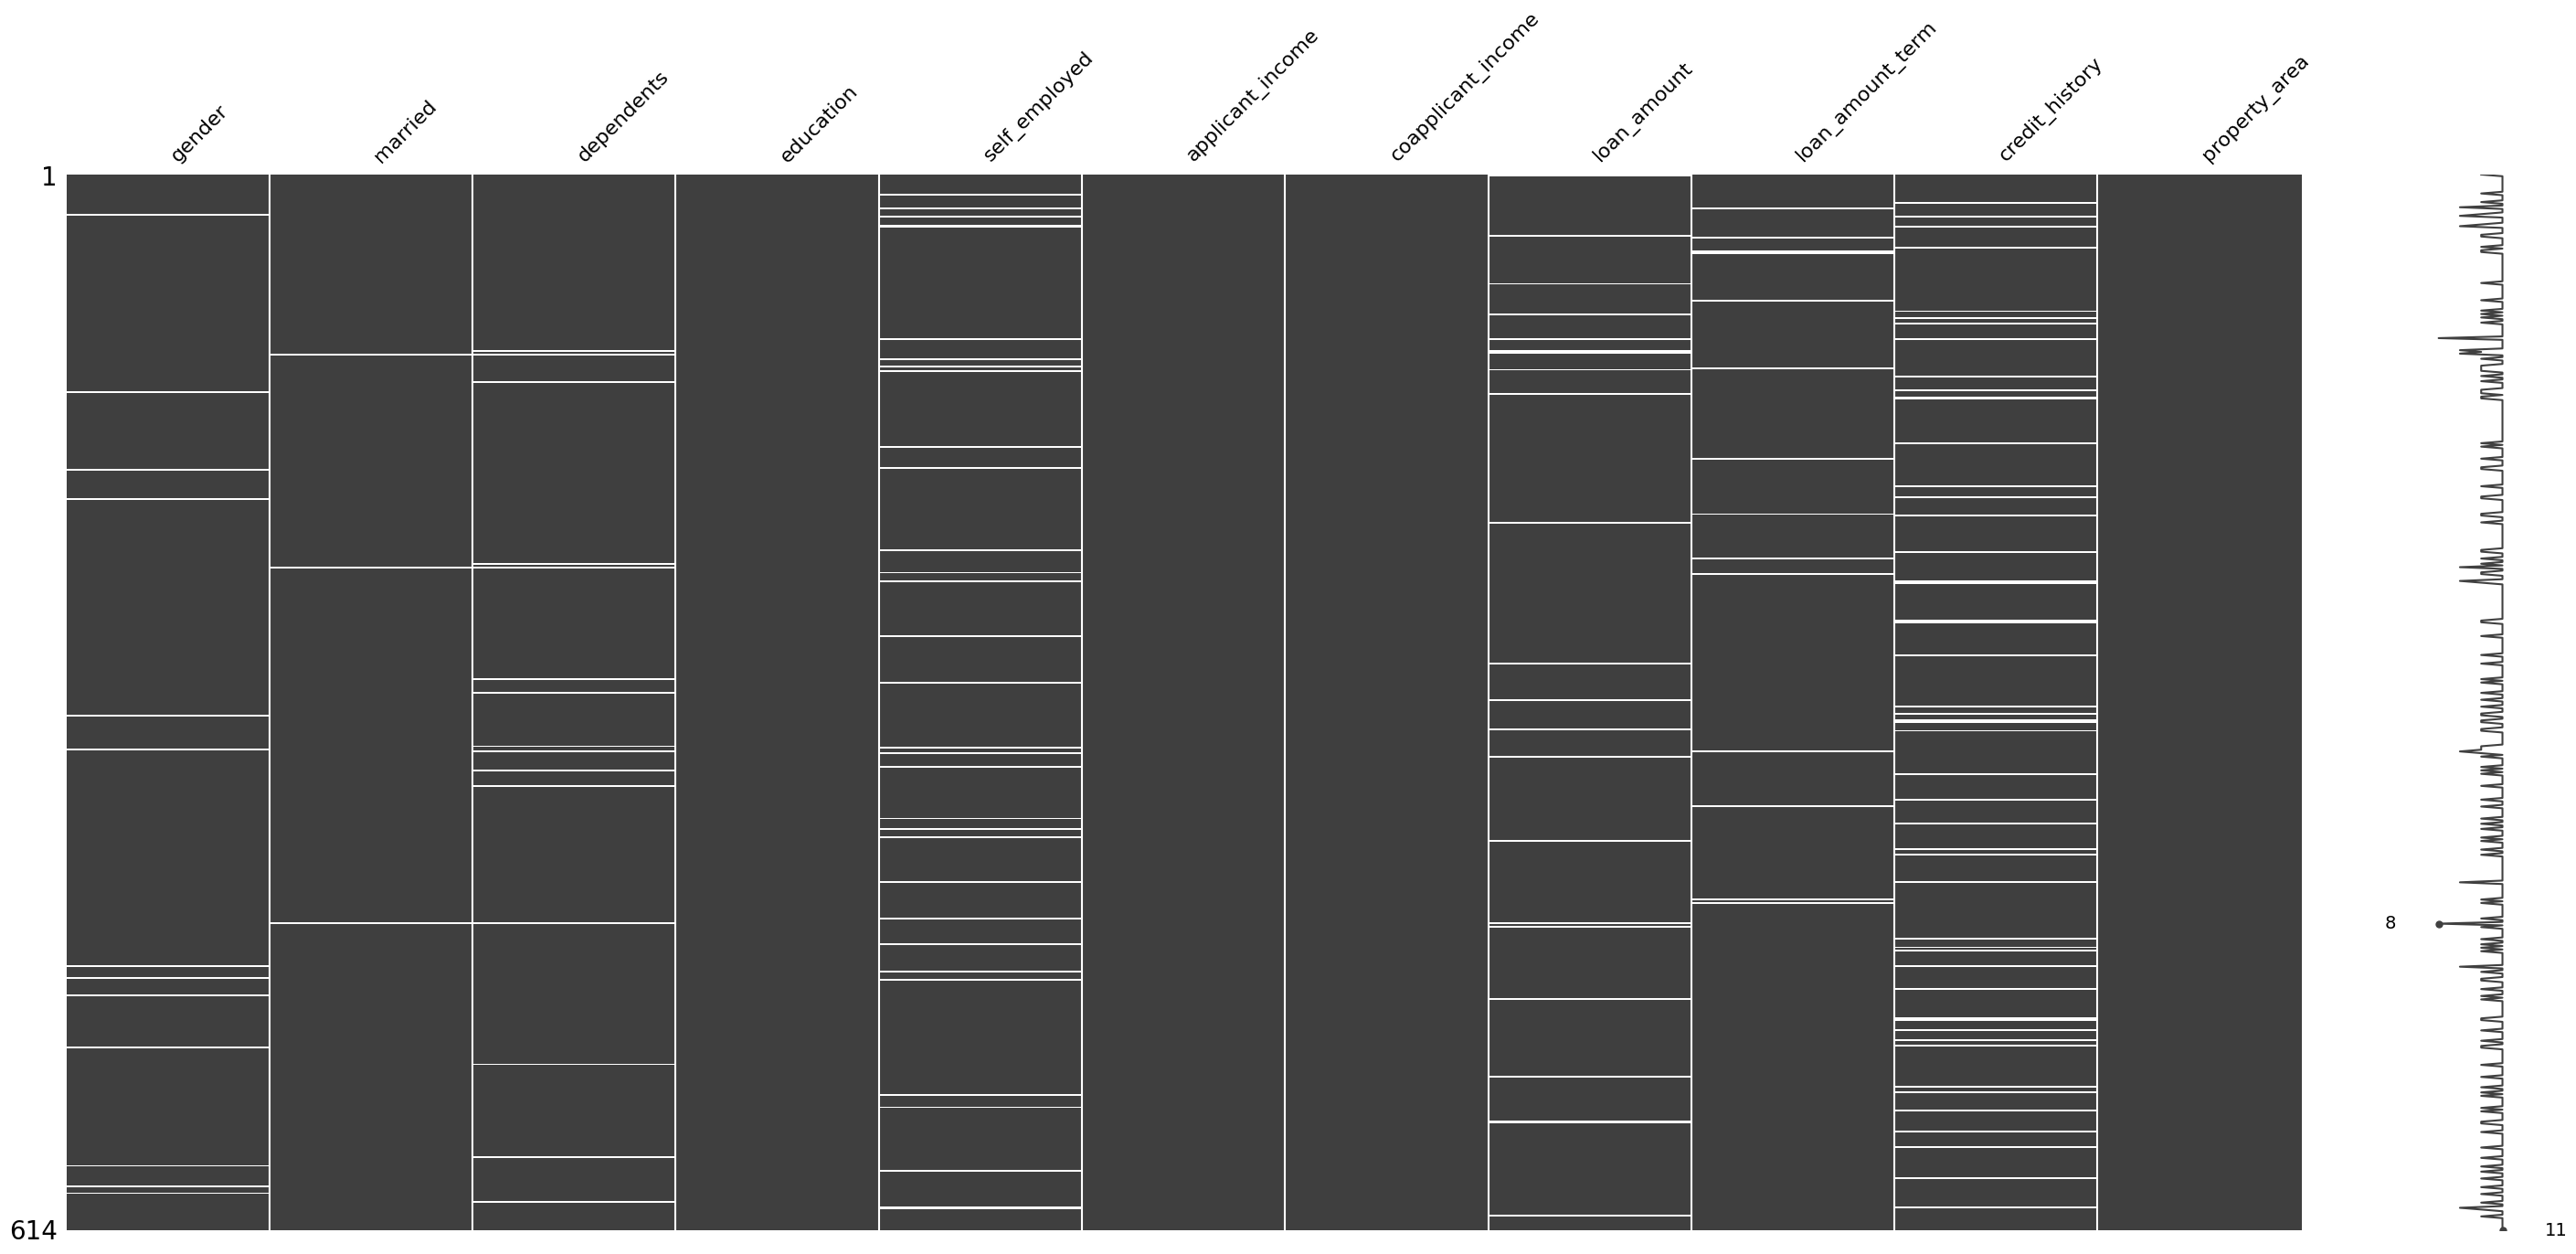

In [31]:
# Generating the matrix plot
msno.matrix(df_consistent[feature_cols], figsize=(35, 15))

<Axes: >

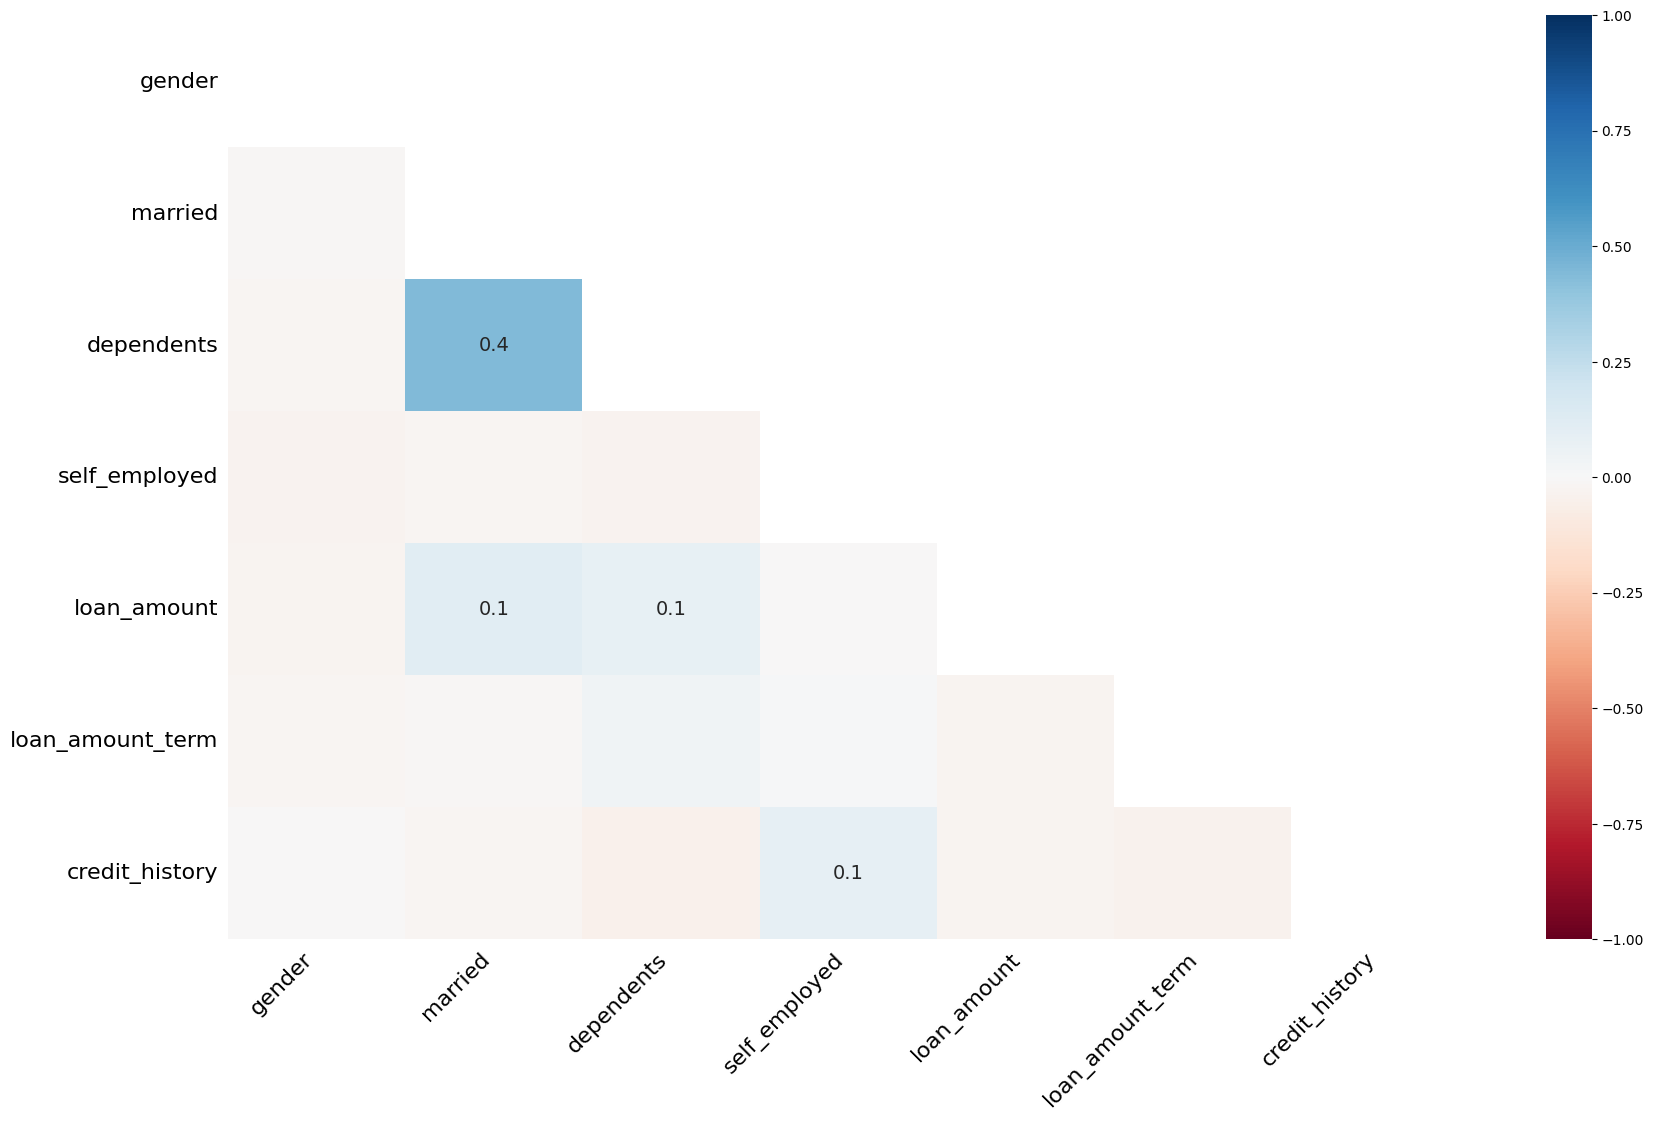

In [32]:
# Create a heatmap to show the correlation of missing values in the selected feature columns of df_consistent with labels indicating the percentage of missing values.
msno.heatmap(df_consistent[feature_cols], labels=True)

In [33]:
# Extracting the columns that have missing values
missing_cols = [cols for cols in feature_cols if df_consistent[cols].isnull().sum() > 0]

<Axes: >

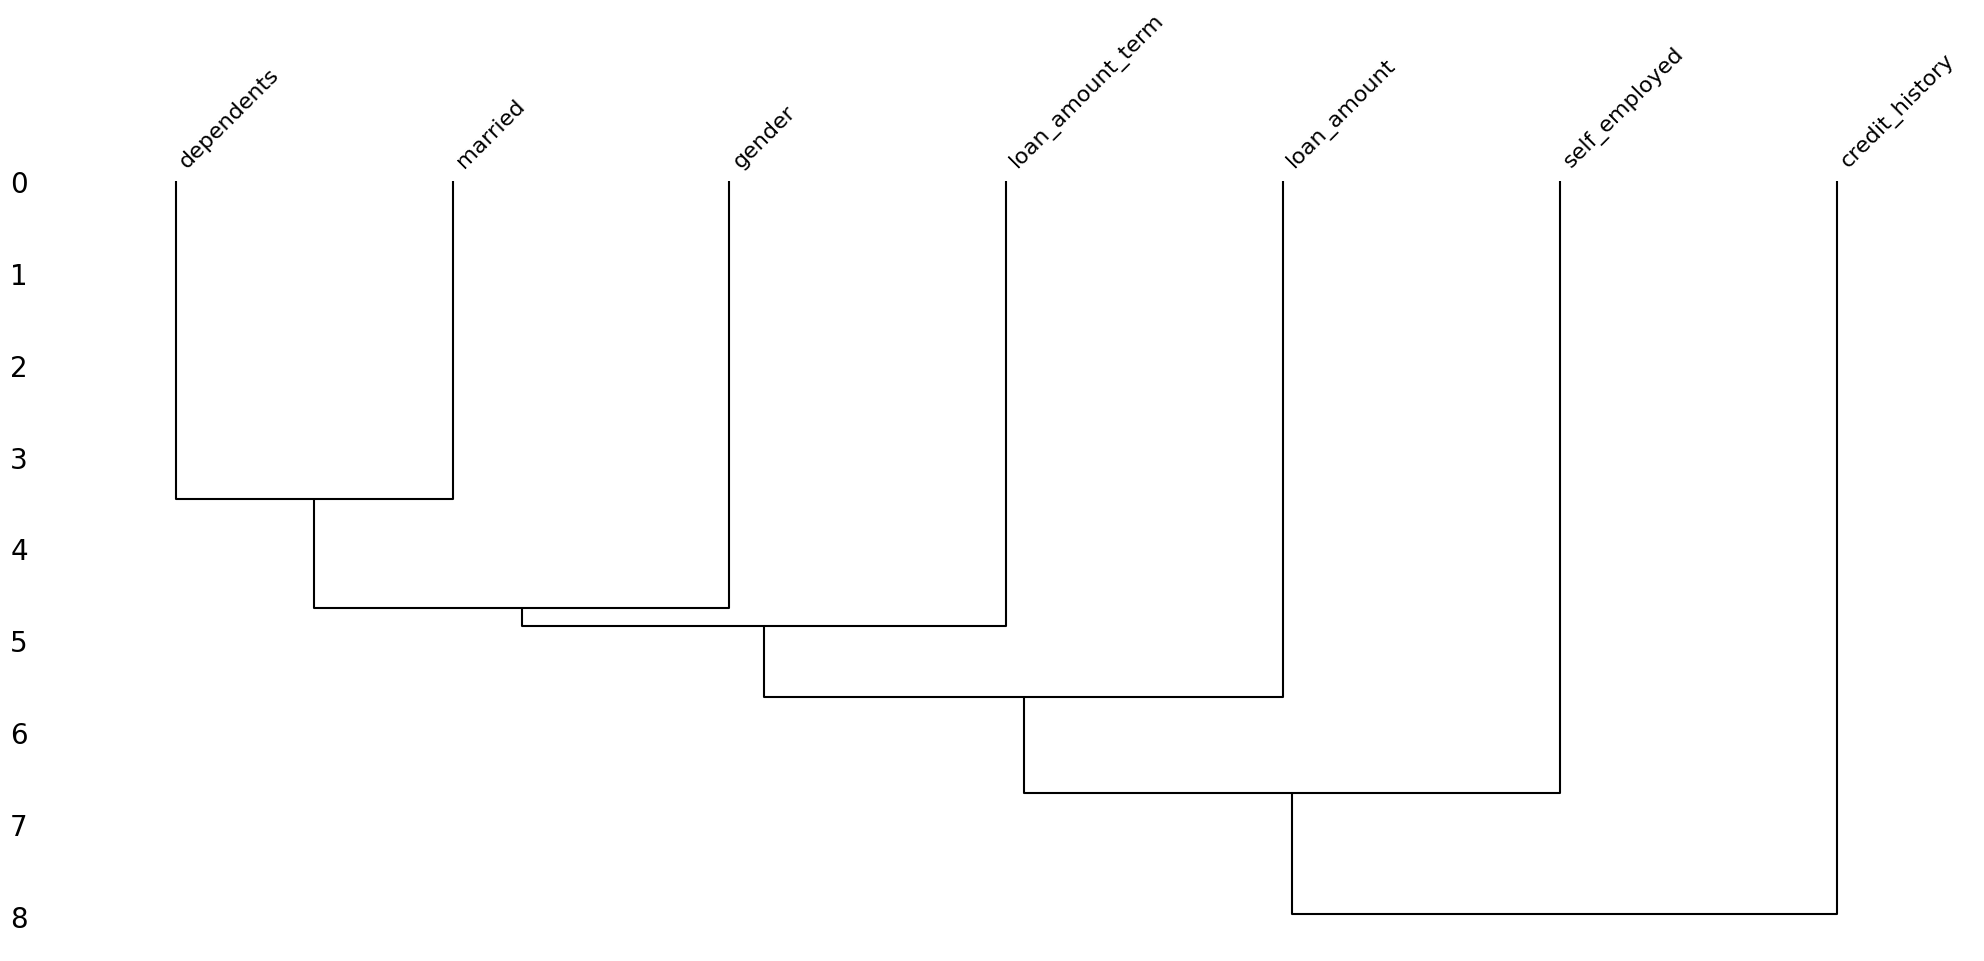

In [34]:
# Generate a dendrogram to display the hierarchical clustering of missing values in the specified columns of the df_consistent DataFrame.
msno.dendrogram(df_consistent[missing_cols])

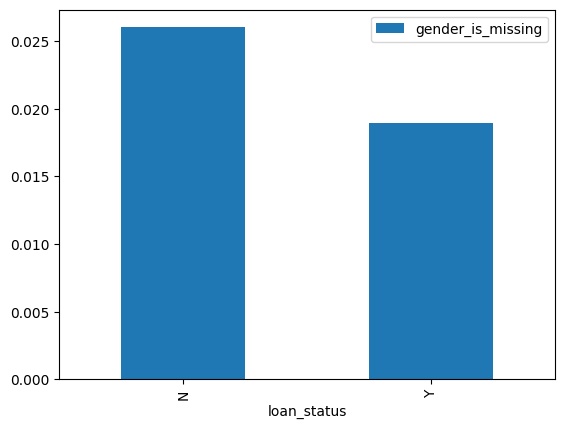

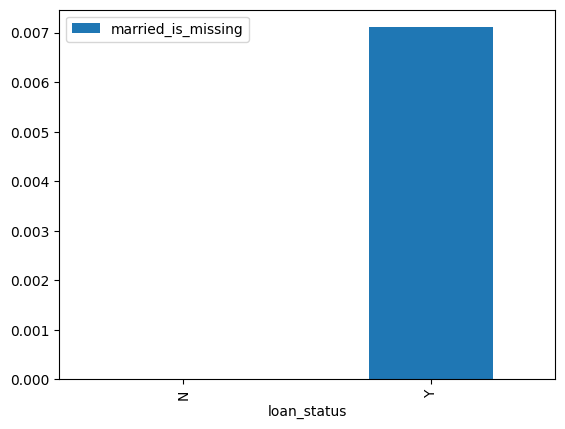

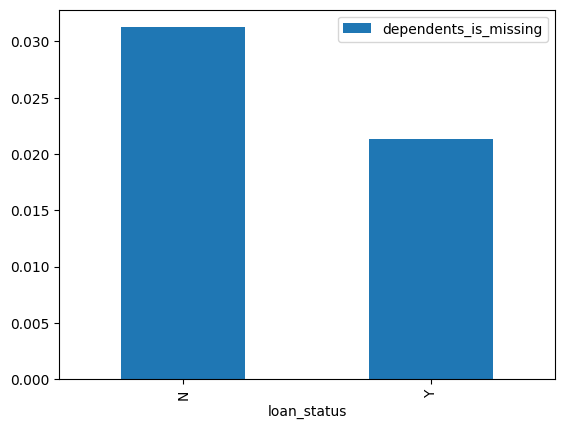

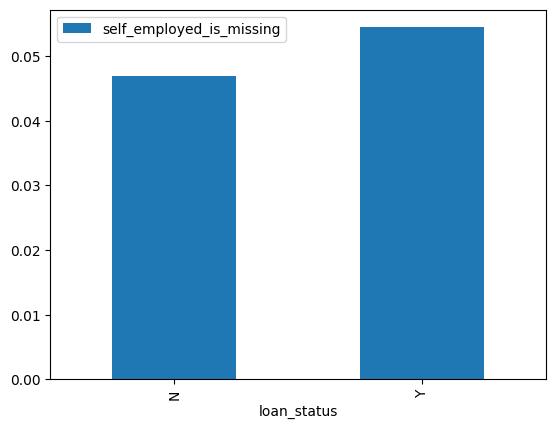

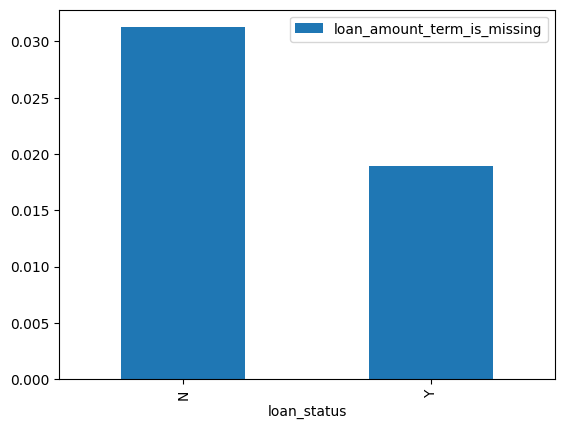

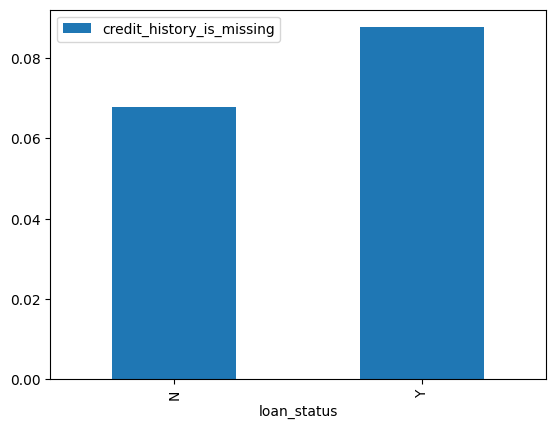

In [35]:
# Identify categorical columns with missing values, plot their association with the target outcome variable.

cat_missing = [cols for cols in cat_cols if df_consistent[cols].isnull().sum() > 0]

def cat_missing_association_with_outcome(data, missing_data_column, outcome):
    """Function to plot missing association of categorical varibles with outcome"""
    
    df = data.copy()
    df[f"{missing_data_column}_is_missing"] = df[missing_data_column].isnull().astype(int)
    df.groupby([outcome]).agg({f"{missing_data_column}_is_missing": 'mean'}).plot.bar()
    
for cols in cat_missing:
    cat_missing_association_with_outcome(df_consistent, cols, target)

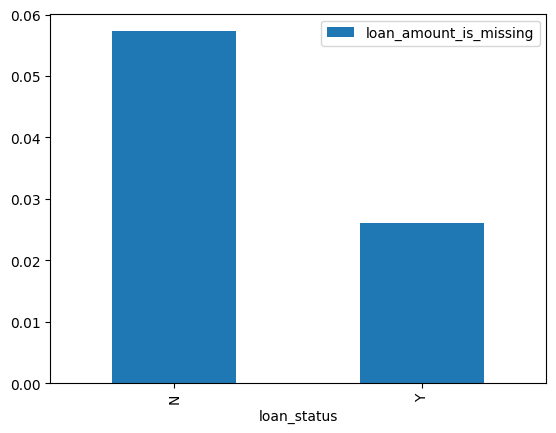

In [36]:
# Identify numerical columns with missing values, plot their association with the target outcome variable.

num_missing = [cols for cols in num_cols if df_consistent[cols].isnull().sum() > 0]

def num_missing_association_with_outcome(data, missing_data_column, outcome):
    """Function to plot missing association of categorical varibles with outcome"""
    
    df = data.copy()
    df[f"{missing_data_column}_is_missing"] = df[missing_data_column].isnull().astype(int)
    df.groupby([outcome]).agg({f"{missing_data_column}_is_missing": 'mean'}).plot.bar()


for cols in num_missing:
    num_missing_association_with_outcome(df, cols, target)

<Axes: ylabel='Density'>

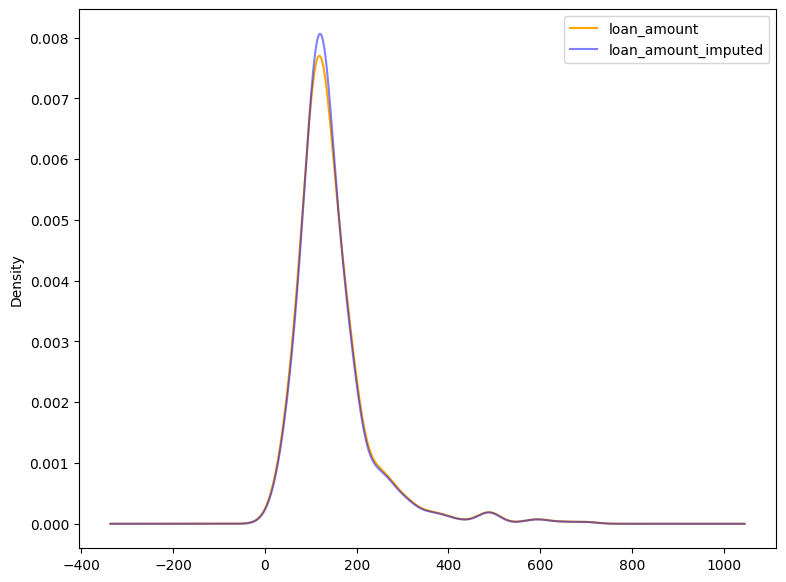

In [37]:
# Plotting kde plots
df_consistent.loan_amount.plot.kde(color='orange', label='loan_amount', legend=True)
df_consistent.loan_amount.fillna(value=df.loan_amount.median()).plot.kde(color='b', label='loan_amount_imputed', alpha=0.5, figsize=(9,7), legend=True)

In [38]:
# Calculate the standard deviation of the 'loan_amount' column in the 'df_consistent' DataFrame rounded to 2 decimal places
round(df_consistent.loan_amount.std(), 2)

# Calculate the standard deviation of the 'loan_amount' column after filling missing values with the median of the column and round to 2 decimal places
round(df_consistent.loan_amount.fillna(value=df_consistent.loan_amount.median()).std(), 2)

84.11

In [39]:
# Getting correlation of numerical columns
df_consistent[num_cols].corr()

,applicant_income,coapplicant_income,loan_amount
applicant_income,1.000000,-0.116605,0.570909
coapplicant_income,-0.116605,1.000000,0.188619
loan_amount,0.570909,0.188619,1.000000


In [40]:
# Identify rows where 'loan_amount' is null in the 'df_consistent' DataFrame
observation = df_consistent[df_consistent.loan_amount.isnull()]

# Initialize a list to store imputed values
imputed_values = []

# Iterate over the rows with missing 'loan_amount' values
for idx in observation.index:
    seed = int(observation.loc[idx,'applicant_income'])
    # Sample a random value from non-null 'loan_amount' values using the applicant's income as the random seed
    imputed_value = df_consistent['loan_amount'].dropna().sample(1, random_state=seed)
    imputed_values.append(imputed_value)

# Fill the missing 'loan_amount' values with the randomly imputed values
df_consistent.loc[df_consistent['loan_amount'].isnull(),'loan_amount_random_imputed'] = imputed_values

# For rows where 'loan_amount' is not null, copy the original 'loan_amount' values to the imputed column
df_consistent.loc[df_consistent['loan_amount'].notnull(),'loan_amount_random_imputed'] = df_consistent[df_consistent['loan_amount'].notnull()]['loan_amount'].values

<Axes: ylabel='Density'>

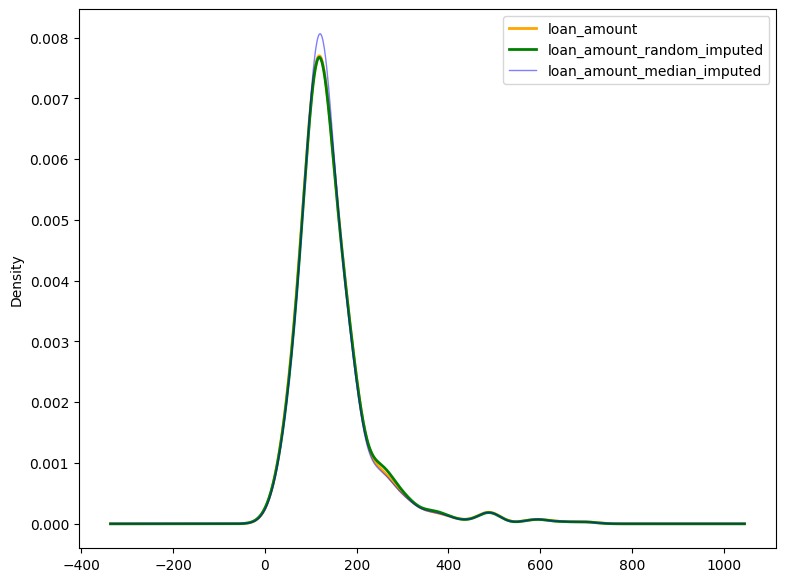

In [41]:
# Plotting and comparing kde plots
df_consistent.loan_amount.plot.kde(color='orange', label='loan_amount', legend=True, linewidth=2)
df_consistent.loan_amount_random_imputed.plot.kde(color='g', label='loan_amount_random_imputed', legend=True, linewidth=2)
df_consistent.loan_amount.fillna(value=df_consistent.loan_amount.median()).plot.kde(color='b', label='loan_amount_median_imputed', linewidth=1, alpha=0.5, figsize=(9,7), legend=True)

In [42]:
# Comparing standard deviations
round(df_consistent.loan_amount.std(),2), round(df_consistent.loan_amount_random_imputed.std(),2), round(df_consistent.loan_amount.fillna(value=df_consistent.loan_amount.median()).std(),2)

(85.59, 85.57, 84.11)

In [43]:
# Adding the median imputed column and checking the correlation
df_consistent['loan_amount_median_imputed'] = df_consistent['loan_amount'].fillna(value=df_consistent['loan_amount'].median())
df_consistent[['loan_amount', 'loan_amount_median_imputed','loan_amount_random_imputed', 'applicant_income']].corr()

,loan_amount,loan_amount_median_imputed,loan_amount_random_imputed,applicant_income
loan_amount,1.000000,1.000000,1.000000,0.570909
loan_amount_median_imputed,1.000000,1.000000,0.979281,0.565181
loan_amount_random_imputed,1.000000,0.979281,1.000000,0.561845
applicant_income,0.570909,0.565181,0.561845,1.000000


In [44]:
# Checking credit history distribution without imputation
df_consistent.credit_history.value_counts(normalize=True)

credit_history
1.0    0.842199
0.0    0.157801
Name: proportion, dtype: float64

In [45]:
# Checking credit history distribution with imputation
df_consistent.credit_history.fillna(value=df_consistent.credit_history.mode()[0]).value_counts(normalize=True)

credit_history
1.0    0.855049
0.0    0.144951
Name: proportion, dtype: float64

In [46]:
# Importing libraries for KNN Imputation
from sklearn.impute import KNNImputer
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.preprocessing import StandardScaler

In [47]:
# This code creates a list of column names in the DataFrame 'df_consistent' that have more than 15 unique values, excluding specific columns like 'id_col' and 'target', and excluding columns that end with 'imputed'.
num_cols = [cols for cols in df_consistent if df_consistent[cols].nunique() > 15 and cols not in [id_col, target] and not cols.endswith('imputed')]

In [48]:
# This code creates a new DataFrame 'df_num' by selecting only the columns specified in the 'num_cols' list from the DataFrame 'df_consistent' and then displays the first few rows of the new DataFrame.
df_num = df_consistent[num_cols].copy()
df_num.head()

,applicant_income,coapplicant_income,loan_amount
0,5849,0.0,NaN
1,4583,1508.0,128.0
2,3000,0.0,66.0
3,2583,2358.0,120.0
4,6000,0.0,141.0


In [49]:
def scale_data(df, scaler, columns):
    """Function to scale the data"""
    
    # Create a copy of the input DataFrame
    df_scaled = df.copy()
    
    # Check if specific columns are specified for scaling
    if columns:
        # Scale only the specified columns using the scaler object
        df_scaled[columns] = scaler.fit_transform(df_scaled[columns])
    else:
        # If no columns are specified, scale all columns in the DataFrame
        columns = [cols for cols in df_scaled]
        df_scaled[columns] = scaler.fit_transform(df_scaled[columns])
    
    # Return the scaled DataFrame and the scaler object
    return df_scaled, scaler

In [50]:
# Create a StandardScaler object
scaler = StandardScaler()

# Scale the numerical columns in DataFrame df_num using the scaler object
# The scaled DataFrame and the scaler object are returned
df_scaled, scaler = scale_data(df_num, scaler=scaler, columns=num_cols)

In [51]:
# Create a SklearnTransformerWrapper object for KNNImputer
knn_imputer = SklearnTransformerWrapper(
    transformer=KNNImputer(n_neighbors=10, weights='distance'),
    variables=num_cols
)

In [52]:
# Imputing the dataframe using the knn imputer
df_imputed = knn_imputer.fit_transform(df_scaled)

In [53]:
# Created the dataframe and viewing first few rows
df_imputed = pd.DataFrame(columns=num_cols, data=scaler.inverse_transform(df_imputed))
df_imputed.head()

,applicant_income,coapplicant_income,loan_amount
0,5849.0,0.0,149.666345
1,4583.0,1508.0,128.000000
2,3000.0,0.0,66.000000
3,2583.0,2358.0,120.000000
4,6000.0,0.0,141.000000


<Axes: ylabel='Density'>

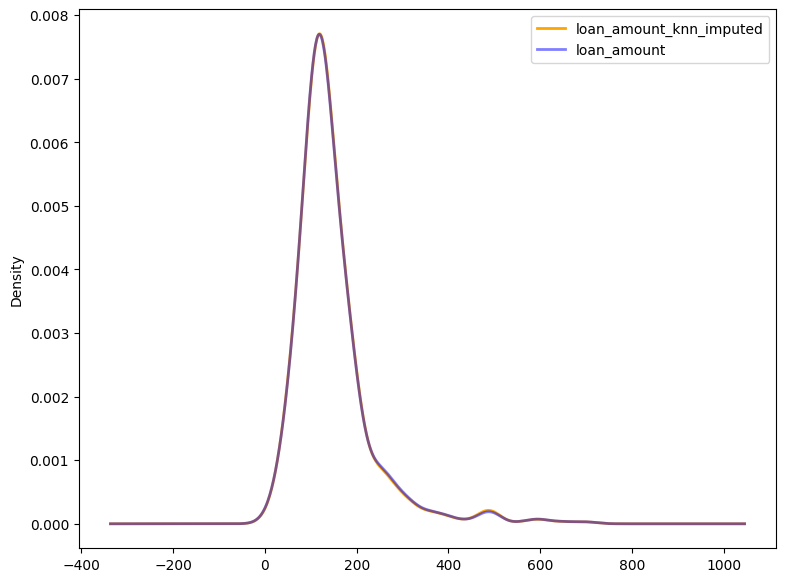

In [54]:
# Created the kde plot and comparing with loan amount
df_imputed['loan_amount'].plot.kde(color='orange', label='loan_amount_knn_imputed',linewidth=2, legend=True)
df_consistent['loan_amount'].plot.kde(color='b', label='loan_amount', legend=True, linewidth=2, figsize=(9,7), alpha=0.5)

In [55]:
# Calculating standard deviation of all loan amounts
round(df_consistent.loan_amount.std(),2), round(df_consistent.loan_amount_random_imputed.std(),2), round(df_consistent.loan_amount_median_imputed.std(),2), round(df_imputed.loan_amount.std(),2)

(85.59, 85.57, 84.11, 85.59)

In [56]:
# Adding the new column and running correlation with all other methods
df_consistent['loan_amount_knn_imputed'] = df_imputed.loan_amount
df_consistent[['loan_amount', 'loan_amount_median_imputed','loan_amount_random_imputed', 'loan_amount_knn_imputed', 'applicant_income']].corr()

,loan_amount,loan_amount_median_imputed,loan_amount_random_imputed,loan_amount_knn_imputed,applicant_income
loan_amount,1.000000,1.000000,1.000000,1.000000,0.570909
loan_amount_median_imputed,1.000000,1.000000,0.979281,0.981185,0.565181
loan_amount_random_imputed,1.000000,0.979281,1.000000,0.970700,0.561845
loan_amount_knn_imputed,1.000000,0.981185,0.970700,1.000000,0.578718
applicant_income,0.570909,0.565181,0.561845,0.578718,1.000000


In [57]:
# Importing the libraries to run MICE implementation which is replication of MissForest in R
from sklearn.ensemble import ExtraTreesRegressor, ExtraTreesClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from feature_engine.encoding import OneHotEncoder

In [58]:
# Extracting the categorical columns that will be one hot encoded
ohe_cols = [cols for cols in cat_cols if df_consistent[cols].dtype == 'object']
ohe_cols

['property_area']

In [59]:
# Created the new dataframe and running one hot encoded
df_ohe_encoded = df_consistent.copy()
ohe = OneHotEncoder(variables=ohe_cols)
df_ohe_encoded = ohe.fit_transform(df_ohe_encoded)

In [60]:
# Checking all columns related to property area
df_ohe_encoded[[cols for cols in df_ohe_encoded if 'property_area' in cols]].head()

,property_area_urban,property_area_rural,property_area_semiurban
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [61]:
# Select categorical columns from df_ohe_encoded where the number of unique values is less than or equal to 15
# and the column is not in the list [id_col, target]
cat_cols = [cols for cols in df_ohe_encoded if df_ohe_encoded[cols].nunique() <= 15 and cols not in [id_col, target]]

In [62]:
cat_cols

['gender',
 'married',
 'dependents',
 'education',
 'self_employed',
 'loan_amount_term',
 'credit_history',
 'property_area_urban',
 'property_area_rural',
 'property_area_semiurban']

In [63]:
# Create an IterativeImputer object using ExtraTreesClassifier as the estimator
miss_forest_classifier = IterativeImputer(estimator=ExtraTreesClassifier(n_estimators=100, 
                                                                        random_state=1,
                                                                        bootstrap=True, 
                                                                        n_jobs=-1),
                           max_iter=10,
                           random_state=1,
                           add_indicator=True,
                           initial_strategy='median')

# Impute missing values in categorical columns using the miss_forest_classifier
df_cat_imputed = miss_forest_classifier.fit_transform(df_ohe_encoded[cat_cols])

In [64]:
# Imputing the categorical columns using MICE implementation
df_cat_imputed = pd.DataFrame(columns=miss_forest_classifier.get_feature_names_out(), 
                               data=df_cat_imputed, 
                               index=df_ohe_encoded.index)
df_cat_imputed.head()

,gender,married,dependents,education,self_employed,loan_amount_term,credit_history,property_area_urban,property_area_rural,property_area_semiurban,missingindicator_gender,missingindicator_married,missingindicator_dependents,missingindicator_self_employed,missingindicator_loan_amount_term,missingindicator_credit_history
0,1.0,0.0,0.0,1.0,0.0,360.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,0.0,360.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,1.0,1.0,360.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,360.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,360.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
# Checking if all columns are imputed and there are no NaNs
for cols in cat_cols:
    print(cols)
    print(df_cat_imputed[cols].unique())
    print()

gender
[1. 0.]

married
[0. 1.]

dependents
[0. 1. 2. 3.]

education
[1. 0.]

self_employed
[0. 1.]

loan_amount_term
[360. 120. 240. 180.  60. 300. 480.  36.  84.  12.]

credit_history
[1. 0.]

property_area_urban
[1. 0.]

property_area_rural
[0. 1.]

property_area_semiurban
[0. 1.]



In [66]:
# Select numerical columns from df_consistent that are not in df_cat_imputed, not in [id_col, target] + ohe_cols,
# and do not end with "imputed"
num_cols = [cols for cols in df_consistent if cols not in df_cat_imputed and cols not in [id_col, target] + ohe_cols 
            and not cols.endswith("imputed")]

# Combine numerical columns from df_consistent and imputed categorical columns df_cat_imputed
df_combined = pd.concat([df_consistent[num_cols], df_cat_imputed], axis=1)

# Create a list of feature columns from df_combined
feature_cols = [cols for cols in df_combined]

In [67]:
feature_cols

['applicant_income',
 'coapplicant_income',
 'loan_amount',
 'gender',
 'married',
 'dependents',
 'education',
 'self_employed',
 'loan_amount_term',
 'credit_history',
 'property_area_urban',
 'property_area_rural',
 'property_area_semiurban',
 'missingindicator_gender',
 'missingindicator_married',
 'missingindicator_dependents',
 'missingindicator_self_employed',
 'missingindicator_loan_amount_term',
 'missingindicator_credit_history']

In [68]:
# Create an IterativeImputer object using ExtraTreesRegressor as the estimator
miss_forest_regressor = IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=100, 
                                                                       random_state=1, 
                                                                       bootstrap=True, 
                                                                       n_jobs=-1),
                           max_iter=10,
                           random_state=1,
                           add_indicator=True,
                           initial_strategy='median')

# Impute missing values in df_combined using the miss_forest_regressor
df_imputed = miss_forest_regressor.fit_transform(df_combined[feature_cols])

In [69]:
# Create a DataFrame using the imputed data with column names from the miss_forest_regressor
df_imputed = pd.DataFrame(data=df_imputed, 
                           columns=miss_forest_regressor.get_feature_names_out(),
                           index=df_combined.index)

In [70]:
# Ensuring all columns are imputed and no missing values are left
df_imputed.isnull().sum()

applicant_income                     0
coapplicant_income                   0
loan_amount                          0
gender                               0
married                              0
dependents                           0
education                            0
self_employed                        0
loan_amount_term                     0
credit_history                       0
property_area_urban                  0
property_area_rural                  0
property_area_semiurban              0
missingindicator_gender              0
missingindicator_married             0
missingindicator_dependents          0
missingindicator_self_employed       0
missingindicator_loan_amount_term    0
missingindicator_credit_history      0
missingindicator_loan_amount         0
dtype: int64

<Axes: ylabel='Density'>

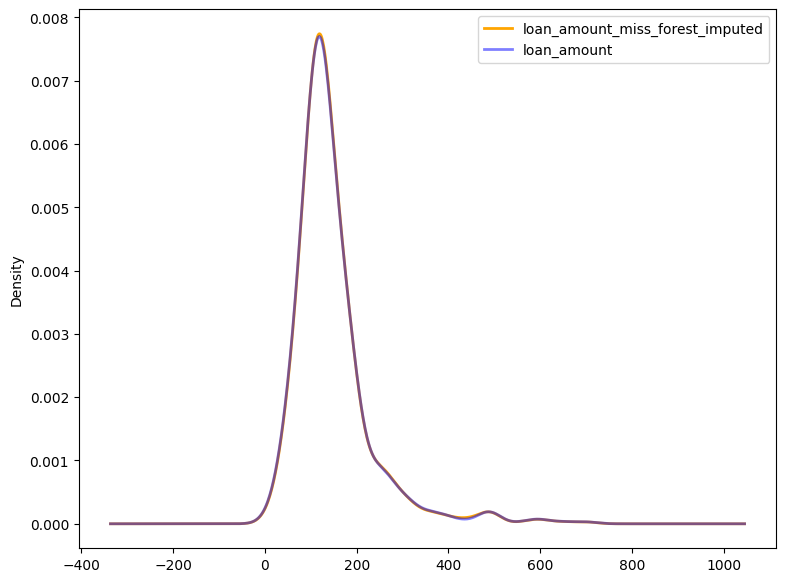

In [71]:
# Running the kde plot and comparing MICE implementation imputation with loan amount 
df_imputed['loan_amount'].plot.kde(color='orange', label='loan_amount_miss_forest_imputed',linewidth=2, legend=True)
df_consistent['loan_amount'].plot.kde(color='b', label='loan_amount', legend=True, linewidth=2, figsize=(9,7), alpha=0.5)

In [72]:
# Comparing standard deviations
round(df_consistent.loan_amount.std(),2), round(df_consistent.loan_amount_random_imputed.std(),2), round(df_consistent.loan_amount_median_imputed.std(),2), round(df_imputed.loan_amount.std(),2)

(85.59, 85.57, 84.11, 85.41)

In [73]:
# Running correlation of MICE imputation with loan amount and applicant_income
df_consistent['loan_amount_miss_forest_imputed'] = df_imputed.loan_amount
df_consistent[['loan_amount', 'loan_amount_median_imputed','loan_amount_random_imputed', 'loan_amount_miss_forest_imputed', 'applicant_income']].corr()

,loan_amount,loan_amount_median_imputed,loan_amount_random_imputed,loan_amount_miss_forest_imputed,applicant_income
loan_amount,1.000000,1.000000,1.000000,1.000000,0.570909
loan_amount_median_imputed,1.000000,1.000000,0.979281,0.982379,0.565181
loan_amount_random_imputed,1.000000,0.979281,1.000000,0.972310,0.561845
loan_amount_miss_forest_imputed,1.000000,0.982379,0.972310,1.000000,0.579011
applicant_income,0.570909,0.565181,0.561845,0.579011,1.000000


In [74]:
# Dropping all columns that end with imputed
df_consistent.drop([cols for cols in df_consistent if cols.endswith('imputed')], axis=1, inplace=True)

In [75]:
# Now putting it all together and importing the libraries to create a pipeline for imputation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from typing import List
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [76]:
# Define the feature columns excluding the target and id columns
feature_cols = [cols for cols in df_consistent if cols not in [target, id_col]]

# Split the data into training and testing sets, with features and target values, using train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_consistent[feature_cols],
                                                    df_consistent[target].map({'Y':1, 'N':0}), 
                                                    test_size=0.1, 
                                                    random_state=1, 
                                                    stratify=df_consistent[target].map({'Y':1, 'N':0}))

In [77]:
feature_cols

['gender',
 'married',
 'dependents',
 'education',
 'self_employed',
 'applicant_income',
 'coapplicant_income',
 'loan_amount',
 'loan_amount_term',
 'credit_history',
 'property_area']

In [78]:
# Identify categorical columns with 15 or fewer unique values
cat_cols = [cols for cols in X_train if X_train[cols].nunique() <= 15]

# Identify numerical columns not included in the categorical columns
num_cols = [cols for cols in X_train if cols not in cat_cols]

In [79]:
def miss_forest_categorical_transformer():
    """Function to define a categorical pipeline that includes one-hot encoding and Missing Forest imputation"""
    
    # Define the categorical transformer pipeline
    cat_transformer = Pipeline(
        steps=[
            ("one_hot_encoding", 
             OneHotEncoder(variables=ohe_cols)
            ),

            ("miss_forest_classifier",
             IterativeImputer(
                estimator=ExtraTreesClassifier(n_estimators=100,
                                              random_state=1,
                                              bootstrap=True, 
                                              n_jobs=-1),
                max_iter=10,
                random_state=1,
                initial_strategy='median',
                add_indicator=True)
            )
        ]
    )
    
    return cat_transformer

In [80]:
def miss_forest_numerical_transformer():
    """Function to define a numerical pipeline that includes Missing Forest imputation"""
    
    # Define the numerical transformer pipeline
    num_transformer = Pipeline(
        steps=[
            ("miss_forest", 
             IterativeImputer(
                estimator=ExtraTreesRegressor(n_estimators=100,
                                              random_state=1,
                                              bootstrap=True, 
                                              n_jobs=-1),
                max_iter=10,
                random_state=1,
                initial_strategy='median',
                add_indicator=True)
            )
        ]
    )
    
    return num_transformer

In [81]:
# Create categorical and numerical transformers
cat_transformer = miss_forest_categorical_transformer()
num_transformer = miss_forest_numerical_transformer()

# Impute missing values in categorical features
X_train_cat_imputed = cat_transformer.fit_transform(X_train[cat_cols])
X_test_cat_imputed = cat_transformer.transform(X_test[cat_cols])

# Create DataFrames for imputed categorical features
X_train_cat_imputed_df = pd.DataFrame(data=X_train_cat_imputed, 
                                      columns=cat_transformer.get_feature_names_out(),
                                      index=X_train.index) 

X_test_cat_imputed_df = pd.DataFrame(data=X_test_cat_imputed, 
                                     columns=cat_transformer.get_feature_names_out(),
                                     index=X_test.index)

# Combine imputed categorical features with numerical features
X_train_cat_imputed_df = pd.concat([X_train_cat_imputed_df, X_train[num_cols]], axis=1)
X_test_cat_imputed_df = pd.concat([X_test_cat_imputed_df, X_test[num_cols]], axis=1)

# Impute missing values in numerical features
X_train_imputed = num_transformer.fit_transform(X_train_cat_imputed_df)
X_test_imputed = num_transformer.transform(X_test_cat_imputed_df)

# Create DataFrames for imputed numerical features
X_train_transformed = pd.DataFrame(data=X_train_imputed, 
                                   columns=num_transformer.get_feature_names_out(),
                                   index=X_train.index)

X_test_transformed = pd.DataFrame(data=X_test_imputed, 
                                  columns=num_transformer.get_feature_names_out(),
                                  index=X_test.index)

In [82]:
X_train_transformed.head()

,gender,married,dependents,education,self_employed,loan_amount_term,credit_history,property_area_rural,property_area_urban,property_area_semiurban,missingindicator_gender,missingindicator_married,missingindicator_dependents,missingindicator_self_employed,missingindicator_loan_amount_term,missingindicator_credit_history,applicant_income,coapplicant_income,loan_amount,missingindicator_loan_amount
364,1.0,0.0,0.0,1.0,1.0,360.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6822.0,0.0,141.0,0.0
112,1.0,1.0,0.0,0.0,0.0,360.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3572.0,4114.0,152.0,0.0
260,1.0,1.0,1.0,1.0,0.0,360.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6083.0,4250.0,330.0,0.0
139,1.0,1.0,2.0,0.0,0.0,360.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4200.0,1430.0,129.0,0.0
186,1.0,1.0,1.0,1.0,1.0,300.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2178.0,0.0,66.0,0.0


In [83]:
X_test_transformed.head()

,gender,married,dependents,education,self_employed,loan_amount_term,credit_history,property_area_rural,property_area_urban,property_area_semiurban,missingindicator_gender,missingindicator_married,missingindicator_dependents,missingindicator_self_employed,missingindicator_loan_amount_term,missingindicator_credit_history,applicant_income,coapplicant_income,loan_amount,missingindicator_loan_amount
451,1.0,1.0,2.0,0.0,0.0,300.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1958.0,1456.0,60.0,0.0
323,0.0,0.0,0.0,1.0,0.0,360.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3166.0,2985.0,132.0,0.0
330,1.0,0.0,1.0,1.0,0.0,360.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4384.0,1793.0,117.0,0.0
414,0.0,1.0,0.0,0.0,0.0,360.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2149.0,3237.0,178.0,0.0
530,1.0,1.0,0.0,1.0,0.0,360.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1025.0,5500.0,216.0,0.0


In [84]:
# Comparing percentage of cre
y_train.mean(), y_test.mean()

(0.6865942028985508, 0.6935483870967742)

In [85]:
# Define the parameter grid for DecisionTreeClassifier hyperparameters
d_param_grid = {
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8, 10, 20],
    'min_samples_leaf': [1, 3, 5, 8, 10, 12, 15],
    'min_samples_split': [2, 6, 10, 16, 20, 24, 30],
    'criterion': ['gini', 'entropy'],
    'random_state': [1], 
    'class_weight': ['balanced']
}

# Instantiate a DecisionTreeClassifier
d_clf = DecisionTreeClassifier()

In [86]:
def train_custom_classifier(X_train, y_train, X_test, y_test, clf, params):
    """
    Function to train the decision tree classifier and return some metrics
    
    Parameters:
    X_train: Training data features
    y_train: Training data labels
    X_test: Testing data features
    y_test: Testing data labels
    clf: Classifier object
    params: Parameters for the classifier
    
    Returns:
    model: Trained classifier model
    testing_predictions: Predictions on the testing data
    training_roc_auc: ROC AUC score on the training data
    testing_roc_auc: ROC AUC score on the testing data
    training_acc: Accuracy score on the training data
    testing_acc: Accuracy score on the testing data
    """

    # Perform GridSearchCV to find the best hyperparameters
    d_clf_cv = GridSearchCV(estimator=d_clf, param_grid=d_param_grid, cv=10, scoring='roc_auc')
    d_clf_cv.fit(X_train, y_train)

    print("Decision tree optimized")

    # Get the best hyperparameters
    d_best_params = d_clf_cv.best_params_

    print(f"Getting the best params which are {d_best_params}")

    # Create a model with the best parameters and fit it on the training data
    model = DecisionTreeClassifier(**d_best_params)
    model.fit(X_train, y_train)

    # Get predicted probabilities for training and testing data
    training_predictions_prob = model.predict_proba(X_train)
    testing_predictions_prob = model.predict_proba(X_test)

    # Get predicted labels for training and testing data
    training_predictions = model.predict(X_train)
    testing_predictions = model.predict(X_test)

    # Calculate ROC AUC scores and accuracy scores
    training_roc_auc = roc_auc_score(y_train, training_predictions_prob[:,1])
    testing_roc_auc = roc_auc_score(y_test, testing_predictions_prob[:,1])

    training_acc = accuracy_score(y_train, training_predictions)
    testing_acc = accuracy_score(y_test, testing_predictions)

    print(f"Training roc is {training_roc_auc}, and testing roc is {testing_roc_auc} \n \
            training accuracy is {training_acc}, testing_acc as {testing_acc}")
    
    return model, testing_predictions, training_roc_auc, testing_roc_auc, training_acc, testing_acc

In [87]:
# Train a custom classifier using the specified parameters and data
model, test_predictions, train_roc, test_roc, train_acc, test_acc = train_custom_classifier(
    X_train=X_train_transformed, 
    y_train=y_train, 
    X_test=X_test_transformed, 
    y_test=y_test, 
    clf=d_clf, 
    params=d_param_grid
)

Decision tree optimized
Getting the best params which are {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 8, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 30, 'random_state': 1}
Training roc is 0.8763326063416048, and testing roc is 0.7858017135862914 
             training accuracy is 0.8152173913043478, testing_acc as 0.7903225806451613


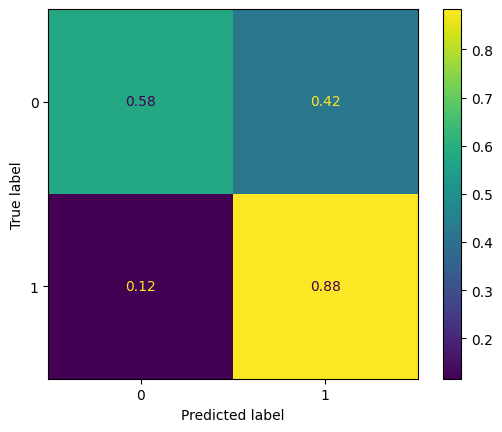

In [88]:
# Displaying confusion matrix
cm = confusion_matrix(y_test, test_predictions, labels=model.classes_, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [89]:
# Define a pipeline for one-hot encoding categorical variables
cat_transformer = Pipeline(
    steps=[
        ("one_hot_encoding", 
         OneHotEncoder(variables=ohe_cols)
        )
    ]
)

# Define a pipeline for imputing missing values with median and adding indicator columns
impute_transformer = Pipeline(
    steps=[
        ("simple_imputer", 
         SimpleImputer(strategy='median',
                       add_indicator=True)
        )
    ]
)

# Apply one-hot encoding to training and testing data
X_train_ohe = cat_transformer.fit_transform(X_train)
X_test_ohe = cat_transformer.transform(X_test)

# Impute missing values and add indicator columns to training and testing data
X_train_imputed = impute_transformer.fit_transform(X_train_ohe)
X_test_imputed = impute_transformer.transform(X_test_ohe)

# Create DataFrames from the transformed data with appropriate column names and indices
X_train_transformed = pd.DataFrame(data=X_train_imputed, 
                                   columns=impute_transformer.get_feature_names_out(),
                                   index=X_train.index)

X_test_transformed = pd.DataFrame(data=X_test_imputed, 
                                  columns=impute_transformer.get_feature_names_out(),
                                  index=X_test.index)

In [90]:
# Train a custom classifier using the specified training and testing data, classifier, and parameter grid
model, test_predictions, train_roc, test_roc, train_acc, test_acc = train_custom_classifier(
    X_train=X_train_transformed, 
    y_train=y_train, 
    X_test=X_test_transformed, 
    y_test=y_test, 
    clf=d_clf, 
    params=d_param_grid
)

Decision tree optimized
Getting the best params which are {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 16, 'random_state': 1}
Training roc is 0.9018942455808563, and testing roc is 0.7270501835985312 
             training accuracy is 0.7771739130434783, testing_acc as 0.6612903225806451


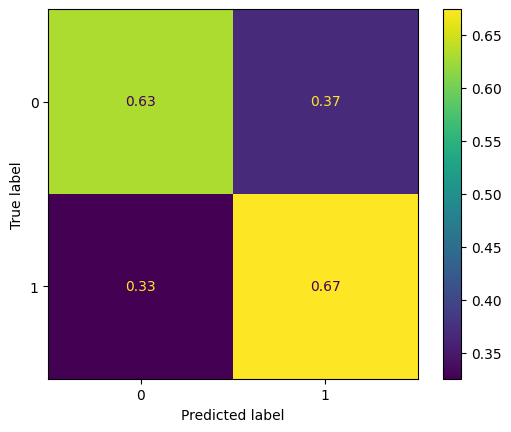

In [91]:
# Confusion matrix
cm = confusion_matrix(y_test, test_predictions, labels=model.classes_, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [92]:
# Generate an array of data cutoff points using linspace function
data_cutoff_points = np.linspace(start=0.1, stop=1, num=10)

# Display the data cutoff points array
data_cutoff_points

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [93]:
# Initialize an empty list to store scores
scores = []

# Iterate through each cutoff point in the data_cutoff_points array
for cutoff in data_cutoff_points:
    # Split the training data based on the cutoff value
    if cutoff < 1.0:
        X_train_subset, X_train_rem, y_train_subset, y_train_rem = train_test_split(X_train, 
                                                                                y_train, 
                                                                                random_state=1, 
                                                                                train_size=cutoff, 
                                                                                stratify=y_train)
    else:
        X_train_subset = X_train.copy()
        y_train_subset = y_train.copy()
    
    # Display the number of rows the model will be trained on
    print(f"Model will be trained on {X_train_subset.shape[0]} rows out of {X_train.shape[0]}")
    
    # Apply missing forest imputation for categorical and numerical features
    cat_transformer = miss_forest_categorical_transformer()
    num_transformer = miss_forest_numerical_transformer()
    
    X_train_cat_imputed = cat_transformer.fit_transform(X_train_subset[cat_cols])
    X_test_cat_imputed = cat_transformer.transform(X_test[cat_cols])

    X_train_cat_imputed_df = pd.DataFrame(data=X_train_cat_imputed, 
                                          columns=cat_transformer.get_feature_names_out(),
                                          index=X_train_subset.index)

    X_test_cat_imputed_df = pd.DataFrame(data=X_test_cat_imputed, 
                                         columns=cat_transformer.get_feature_names_out(),
                                         index=X_test.index)

    X_train_cat_imputed_df = pd.concat([X_train_cat_imputed_df, X_train_subset[num_cols]], axis=1)
    X_test_cat_imputed_df = pd.concat([X_test_cat_imputed_df, X_test[num_cols]], axis=1)

    X_train_imputed = num_transformer.fit_transform(X_train_cat_imputed_df)
    X_test_imputed = num_transformer.transform(X_test_cat_imputed_df)

    X_train_transformed = pd.DataFrame(data=X_train_imputed, 
                                       columns=num_transformer.get_feature_names_out(),
                                       index=X_train_subset.index)

    X_test_transformed = pd.DataFrame(data=X_test_imputed, 
                                      columns=num_transformer.get_feature_names_out(),
                                      index=X_test.index)
    
    # Train a custom classifier on the transformed data
    model, test_predictions, train_roc, test_roc, train_acc, test_acc = train_custom_classifier(
        X_train=X_train_transformed, 
        y_train=y_train_subset, 
        X_test=X_test_transformed, 
        y_test=y_test, 
        clf=d_clf, 
        params=d_param_grid)
    
    # Append the scores to the list
    scores.append((cutoff, train_roc, test_roc, train_acc, test_acc))

Model will be trained on 55 rows out of 552
Decision tree optimized
Getting the best params which are {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 6, 'random_state': 1}
Training roc is 0.9094427244582044, and testing roc is 0.5917992656058751 
             training accuracy is 0.7454545454545455, testing_acc as 0.5806451612903226
Model will be trained on 110 rows out of 552
Decision tree optimized
Getting the best params which are {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 6, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 20, 'random_state': 1}
Training roc is 0.901702786377709, and testing roc is 0.7552019583843328 
             training accuracy is 0.7272727272727273, testing_acc as 0.6290322580645161
Model will be trained on 165 rows out of 552
Decision tree optimized
Getting the best params which are {'class_weight': 'balanced', 'criterion': 'gini', 

In [94]:
# Creating a dataframe to show error analysis results
df = pd.DataFrame(data=scores, columns=['data_size', 'training_roc', 'testing_roc', "training_acc", "testing_acc"])

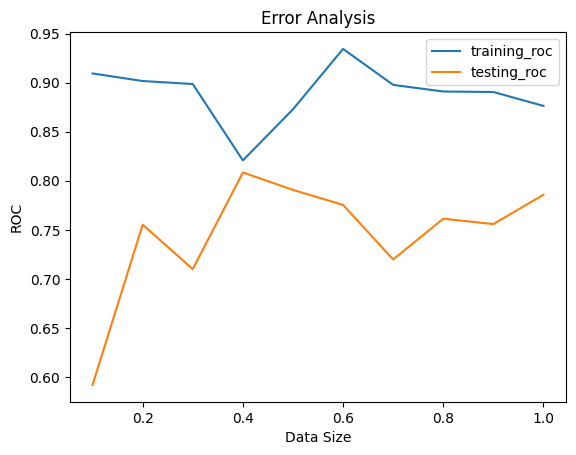

In [95]:
# Plotting ROC for error analysis
plt.plot(df.data_size, df.training_roc, label='training_roc')
plt.plot(df.data_size, df.testing_roc, label='testing_roc')
plt.xlabel("Data Size")
plt.ylabel("ROC")
plt.title("Error Analysis")
plt.legend()

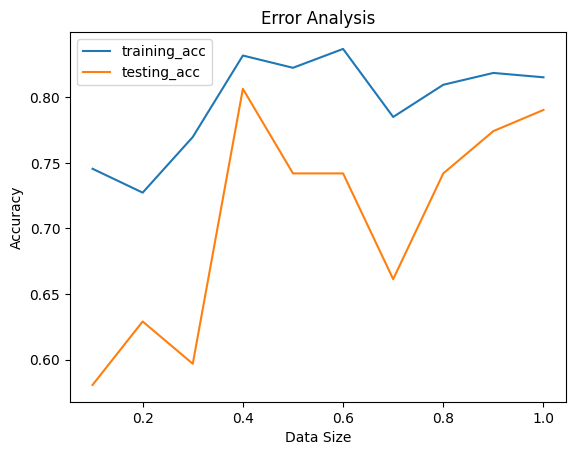

In [96]:
# Plotting Accuracy for error analysis
plt.plot(df.data_size, df.training_acc, label='training_acc')
plt.plot(df.data_size, df.testing_acc, label='testing_acc')
plt.xlabel("Data Size")
plt.ylabel("Accuracy")
plt.title("Error Analysis")
plt.legend()

In [97]:
# Define a list of income variables
income_variables = ['applicant_income', 'coapplicant_income']

# Define a list for the loan amount variable
loan_variable = ['loan_amount']

# Define a list for the loan term variable
loan_term_variable = ['loan_amount_term']

In [98]:
# Importing libraries for feature engineering
from feature_engine.creation.math_features import MathFeatures
from feature_engine.creation.relative_features import RelativeFeatures
from sklearn.base import BaseEstimator, TransformerMixin
from feature_engine.selection import DropFeatures

In [99]:
# Custom transformer that multiplies columns with a value
class MultiplyColumns(BaseEstimator, TransformerMixin):
    """Custom pipeline class to multiply columns passed in a dataframe with a specified value"""
    
    def __init__(self, multiply_by=1, variables=None):
        self.multiply_by = multiply_by  # Value to multiply the columns by
        self.variables = variables  # List of columns to be multiplied
    
    def fit(self, X, y=None):
        # Fit method, nothing to be done here
        return self
    
    def transform(self, X, y=None):
        # Transform method to multiply selected columns by the specified value
        if self.variables:
            X[self.variables] = X[self.variables] * self.multiply_by
        return X

In [100]:
# Define transformers for categorical and numerical missing value imputation
cat_transformer = miss_forest_categorical_transformer()
num_transformer = miss_forest_numerical_transformer()

# Define a feature transformation pipeline
feature_transformer = Pipeline(
    steps=[
        ("multiply_by_thousand",
         MultiplyColumns(
             multiply_by=1000,
             variables=loan_variable
         )
        ),
        ("add_columns",
         MathFeatures(
             variables=income_variables,
             func='sum'
         )   
        ),
        ("income_to_loan_ratio",
         RelativeFeatures(variables=[f"sum_{income_variables[0]}_{income_variables[1]}"],
                          reference=loan_variable,
                          func=["div"]
                         )
        ),
        ("emi",
         RelativeFeatures(variables=loan_variable,
                          reference=loan_term_variable,
                          func=["div"])
        ),
        ("drop_features",
         DropFeatures(features_to_drop=income_variables)
        )
    ]
)

# Transform categorical features in the training and test sets
X_train_cat_imputed = cat_transformer.fit_transform(X_train[cat_cols])
X_test_cat_imputed = cat_transformer.transform(X_test[cat_cols])

# Create dataframes with transformed categorical features
X_train_cat_imputed_df = pd.DataFrame(data=X_train_cat_imputed, 
                                      columns=cat_transformer.get_feature_names_out(),
                                      index=X_train.index) 

X_test_cat_imputed_df = pd.DataFrame(data=X_test_cat_imputed, 
                                     columns=cat_transformer.get_feature_names_out(),
                                     index=X_test.index)

# Concatenate numerical features with transformed categorical features
X_train_cat_imputed_df = pd.concat([X_train_cat_imputed_df, X_train[num_cols]], axis=1)
X_test_cat_imputed_df = pd.concat([X_test_cat_imputed_df, X_test[num_cols]], axis=1)

# Impute missing values in numerical features for training and test sets
X_train_imputed = num_transformer.fit_transform(X_train_cat_imputed_df)
X_test_imputed = num_transformer.transform(X_test_cat_imputed_df)

# Create dataframes with imputed numerical features
X_train_imputed_df = pd.DataFrame(data=X_train_imputed, 
                                   columns=num_transformer.get_feature_names_out(),
                                   index=X_train.index)

X_test_imputed_df = pd.DataFrame(data=X_test_imputed, 
                                  columns=num_transformer.get_feature_names_out(),
                                  index=X_test.index)

# Transform features using the defined feature transformation pipeline
X_train_transformed = feature_transformer.fit_transform(X_train_imputed_df)
X_test_transformed = feature_transformer.transform(X_test_imputed_df)

In [101]:
# Train a custom classifier model using the provided data and parameters
model, test_predictions, train_roc, test_roc, train_acc, test_acc = train_custom_classifier(
    X_train=X_train_transformed,  # Transformed training data
    y_train=y_train,  # Training labels
    X_test=X_test_transformed,  # Transformed test data
    y_test=y_test,  # Test labels
    clf=d_clf,  # Classifier model
    params=d_param_grid  # Parameters for the classifier
)

Decision tree optimized
Getting the best params which are {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 24, 'random_state': 1}
Training roc is 0.8465996614150411, and testing roc is 0.8188494492044063 
             training accuracy is 0.8206521739130435, testing_acc as 0.8225806451612904


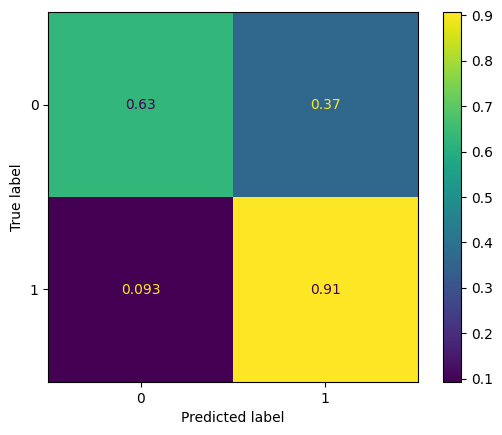

In [102]:
# Displaying the confusion matrix
cm = confusion_matrix(y_test, test_predictions, labels=model.classes_, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

# 4. Ensuring data is valid

In [103]:
# Creating new random dataset
np.random.seed(1)
data = {
    "id": np.linspace(start=1, stop=10, num=10, dtype=int),
    "population" : np.random.randint(low=1000, high=100000, size=10),
    "property_area": ["urban"]*4 + ["semi_urban"]*5 + ["rural"]*1
}

df = pd.DataFrame(data=data)

In [104]:
# Checking first few values
df.head()

,id,population,property_area
0,1,99539,urban
1,2,78708,urban
2,3,6192,urban
3,4,99047,urban
4,5,51057,semi_urban


In [105]:
# Checking the distribution of property_area
df.property_area.value_counts(normalize=True)

property_area
semi_urban    0.5
urban         0.4
rural         0.1
Name: proportion, dtype: float64

In [106]:
# Printing each row where values are in rural and urban, doing a boolean check
df.property_area.isin(['rural', 'urban']) == False

0    False
1    False
2    False
3    False
4     True
5     True
6     True
7     True
8     True
9    False
Name: property_area, dtype: bool

In [107]:
# Comparing against the total where number of values are in valid set
sum(df.property_area.isin(['rural', 'urban']) == False) / df.shape[0]

0.5

# 5. Ensuring data is accurate

In [108]:
# Create a new column 'true_property_area' based on the 'population' column
df['true_property_area'] = df.population.apply(lambda value: 'rural' if value <= 20000 else 'urban')

In [109]:
df[['true_property_area', 'property_area', 'population']]

,true_property_area,property_area,population
0,urban,urban,99539
1,urban,urban,78708
2,rural,urban,6192
3,urban,urban,99047
4,urban,semi_urban,51057
5,urban,semi_urban,74349
6,urban,semi_urban,22440
7,urban,semi_urban,99448
8,urban,semi_urban,21609
9,urban,rural,50100


In [110]:
# Calculating the accuracy score
sum(df.property_area == df.true_property_area) / df.shape[0]

0.3

In [111]:
# Using the accuracy score for validation
accuracy_score(y_pred=df.property_area, y_true=df.true_property_area)

0.3

# 6. Ensuring data is fresh

In [112]:
# Importing libraries
from datetime import datetime, timedelta
import warnings

In [113]:
numdays = 100
base = datetime.today() 

# Generate a list of dates by subtracting days from today's date
date_list = [base - timedelta(days=day) for day in range(numdays)]

In [114]:
# Printing the first 10 dates
[date.date().strftime('%Y-%m-%d') for date in date_list[0:10]]

['2024-02-21',
 '2024-02-20',
 '2024-02-19',
 '2024-02-18',
 '2024-02-17',
 '2024-02-16',
 '2024-02-15',
 '2024-02-14',
 '2024-02-13',
 '2024-02-12']

In [115]:
# Generating the new dataset
np.random.seed(1) 

# Create a dictionary 'data' with columns 'id', 'population', 'property_area', and 'date_loaded'
data = {
    "id": np.linspace(start=1, stop=100, num=100, dtype=int),
    "population" : np.random.randint(low=1000, high=100000, size=100),
    "property_area": ["urban"]*40 + ["semi_urban"]*50 + ["rural"]*10,
    "date_loaded": date_list
}

# Create a DataFrame 'df' using the data dictionary
df = pd.DataFrame(data=data)


In [116]:
df.head()

,id,population,property_area,date_loaded
0,1,99539,urban,2024-02-21 01:22:19.866572
1,2,78708,urban,2024-02-20 01:22:19.866572
2,3,6192,urban,2024-02-19 01:22:19.866572
3,4,99047,urban,2024-02-18 01:22:19.866572
4,5,51057,urban,2024-02-17 01:22:19.866572


In [117]:
# One line code to subract max date from todays date
(datetime.now() - df.date_loaded.max()).days

0

In [118]:
def check_data_recency_days(df: pd.DataFrame, loaded_at_column: str, warning_at: int=5, error_at: int=10):
    """Function to detect data freshness"""
    
    df = df.copy()
    
    # Calculate the number of days since the data was last refreshed
    days_since_data_refreshed = (datetime.now() - df[loaded_at_column].max()).days
    
    if days_since_data_refreshed < warning_at:
        print(f"Data is fresh and is {days_since_data_refreshed} days old")
    
    elif error_at > days_since_data_refreshed >= warning_at:
        warnings.warn(f"Warning: Data is not fresh, and is {days_since_data_refreshed} days old")
    
    else:
        raise ValueError(f"Date provided is too old and stale, please contact source provider: {days_since_data_refreshed} days old")

In [119]:
# Next we will check the recency of the data in days
check_data_recency_days(df, "date_loaded")

Data is fresh and is 0 days old


In [120]:
# Creating two data subsets, one six days old data and one 12 days old data
df_filter_6_days = df[df.date_loaded <= (datetime.today() -  timedelta(days=6))] 
df_filter_12_days = df[df.date_loaded <= (datetime.today() -  timedelta(days=12))]

In [121]:
# Validating that data is six days old
check_data_recency_days(df_filter_6_days, "date_loaded")

/var/folders/6f/p7312_7n4nq5hp35rfymms1h0000gn/T/ipykernel_20086/3692455968.py:13: UserWarning: Warning: Data is not fresh, and is 6 days old
  warnings.warn(f"Warning: Data is not fresh, and is {days_since_data_refreshed} days old")


In [122]:
# Importing alibi package and other package to calculate drift
import alibi
from alibi_detect.cd import TabularDrift

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [123]:
# Now moving back to loan dataset
# Initialize a TabularDrift object with reference data X_train_transformed and p-value of 0.05
cd = TabularDrift(x_ref=X_train_transformed.to_numpy(), p_val=0.05)

/Users/bajajn/.local/share/virtualenvs/financial-VBwT6U-y/lib/python3.9/site-packages/alibi_detect/cd/tabular.py:113: UserWarning: No `categories_per_feature` dict provided so all features are assumed to be numerical. `KSDrift` will be applied to all features.
  warnings.warn('No `categories_per_feature` dict provided so all features are assumed to be numerical. '


In [124]:
# Make drift prediction on the transformed test data X_test_transformed
preds = cd.predict(X_test_transformed.to_numpy())

# Define labels for drift result interpretation
labels = ['No', 'Yes']

# Print the drift prediction result
print('Drift: {}'.format(labels[preds['data']['is_drift']]))

Drift: No


In [125]:
X_test_transformed.head()

,gender,married,dependents,education,self_employed,loan_amount_term,credit_history,property_area_rural,property_area_urban,property_area_semiurban,...,missingindicator_married,missingindicator_dependents,missingindicator_self_employed,missingindicator_loan_amount_term,missingindicator_credit_history,loan_amount,missingindicator_loan_amount,sum_applicant_income_coapplicant_income,sum_applicant_income_coapplicant_income_div_loan_amount,loan_amount_div_loan_amount_term
451,1.0,1.0,2.0,0.0,0.0,300.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,60000.0,0.0,3414.0,0.056900,200.000000
323,0.0,0.0,0.0,1.0,0.0,360.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,132000.0,0.0,6151.0,0.046598,366.666667
330,1.0,0.0,1.0,1.0,0.0,360.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,117000.0,0.0,6177.0,0.052795,325.000000
414,0.0,1.0,0.0,0.0,0.0,360.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,178000.0,0.0,5386.0,0.030258,494.444444
530,1.0,1.0,0.0,1.0,0.0,360.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,216000.0,0.0,6525.0,0.030208,600.000000


In [126]:
# Updating the dataset, to demonstrate test data is stale, so can demonstrate performance of stale data
X_test_transformed['loan_amount'] = X_test_transformed['loan_amount']*1.5
X_test_transformed['sum_applicant_income_coapplicant_income'] = X_test_transformed['sum_applicant_income_coapplicant_income']*1.2
X_test_transformed.sum_applicant_income_coapplicant_income_div_loan_amount = X_test_transformed.sum_applicant_income_coapplicant_income/X_test_transformed.loan_amount
X_test_transformed.loan_amount_div_loan_amount_term = X_test_transformed.loan_amount/X_test_transformed.loan_amount_term

In [127]:
# Get drift prediction for the transformed test data X_test_transformed
preds = cd.predict(X_test_transformed.to_numpy())

# Create labels for interpreting the drift prediction
labels = ['No', 'Yes']

# Output the drift prediction result
print('Drift: {}'.format(labels[preds['data']['is_drift']]))

Drift: Yes


In [128]:
# Generate probability predictions for the test data using the model
testing_predictions_prob = model.predict_proba(X_test_transformed)

# Obtain class predictions for the test data using the model
testing_predictions = model.predict(X_test_transformed)

# Calculate the ROC AUC score for the test predictions
testing_roc_auc = roc_auc_score(y_test, testing_predictions_prob[:,1])

# Calculate the accuracy score for the test predictions
testing_acc = accuracy_score(y_test, testing_predictions)

# Print out the ROC AUC score and accuracy for the test predictions
print(f"Testing roc is {testing_roc_auc} and testing_acc as {testing_acc}")

Testing roc is 0.747858017135863 and testing_acc as 0.6935483870967742
